In [26]:
import pandas as pd
import os

# Load the dataset
file_path = r"C:\Users\neeth\Downloads\CarPrice_Assignment.csv"

# Display basic information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Convert Categorical Variables to Numeric
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Define Features and Target Variable
X = df.drop(columns=['price'])  # Drop target variable
y = df['price']  # Target variable

# Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nDataset Preprocessing Completed Successfully!")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null

In [39]:
# Import Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and Evaluate Each Model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train Model
    y_pred = model.predict(X_test)  # Make Predictions
    
    # Calculate Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {"MSE": mse, "MAE": mae, "R2": r2}
    
    # Print Model Performance
    print(f"\n{name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared Score (R²): {r2:.4f}")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)



Linear Regression Performance:
Mean Squared Error (MSE): 12306121.3029
Mean Absolute Error (MAE): 2087.3062
R-squared Score (R²): 0.8441

Decision Tree Regressor Performance:
Mean Squared Error (MSE): 9532215.7769
Mean Absolute Error (MAE): 2090.6992
R-squared Score (R²): 0.8793

Random Forest Regressor Performance:
Mean Squared Error (MSE): 3399231.7486
Mean Absolute Error (MAE): 1307.7847
R-squared Score (R²): 0.9569

Gradient Boosting Regressor Performance:
Mean Squared Error (MSE): 5282946.9289
Mean Absolute Error (MAE): 1597.2791
R-squared Score (R²): 0.9331

Support Vector Regressor Performance:
Mean Squared Error (MSE): 86850529.7690
Mean Absolute Error (MAE): 5696.7073
R-squared Score (R²): -0.1002

Model Performance Comparison:
                                      MSE          MAE        R2
Linear Regression            1.230612e+07  2087.306212  0.844116
Decision Tree Regressor      9.532216e+06  2090.699195  0.879253
Random Forest Regressor      3.399232e+06  1307.784707  0

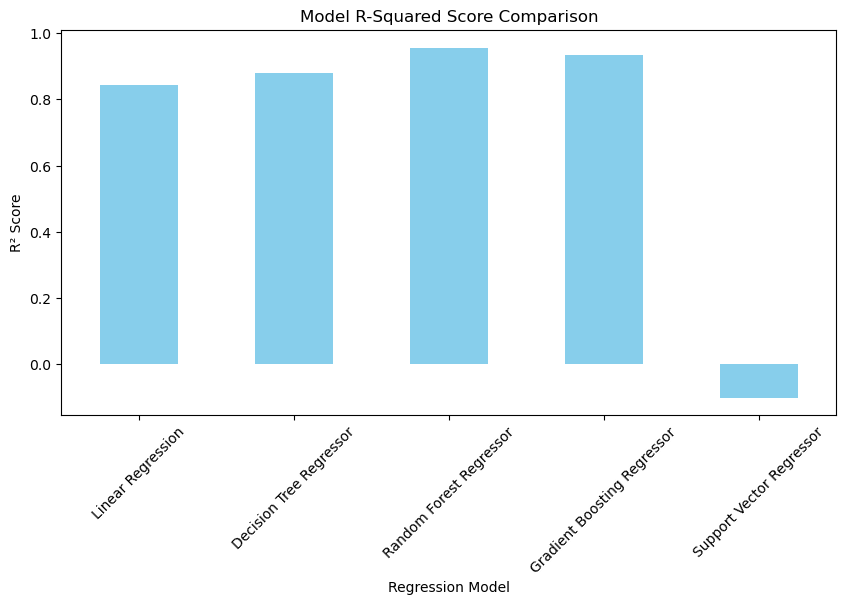


Best Performing Model: Random Forest Regressor
Worst Performing Model: Support Vector Regressor


In [30]:
# Step 1: Visualize Model Performance
plt.figure(figsize=(10, 5))
results_df['R2'].plot(kind='bar', color='skyblue')
plt.title('Model R-Squared Score Comparison')
plt.xlabel('Regression Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()

# Step 2: Identify Best and Worst Performing Models
best_model = results_df['R2'].idxmax()
worst_model = results_df['R2'].idxmin()
print(f"\nBest Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")


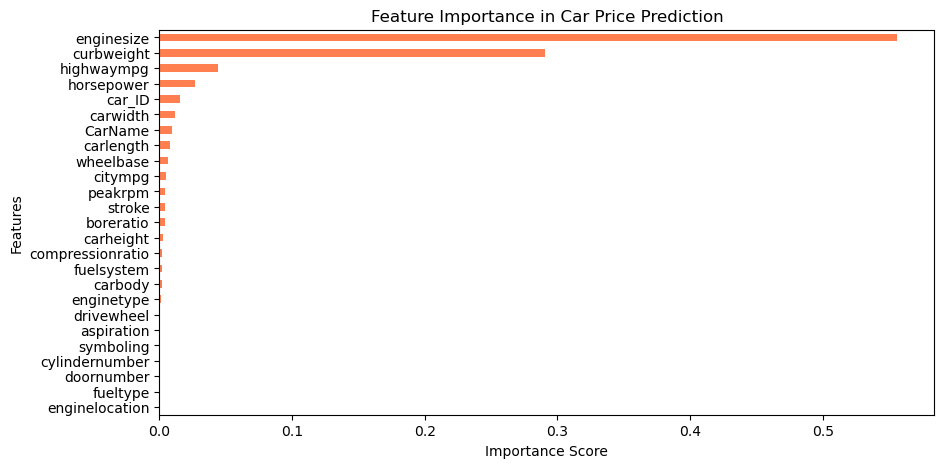

In [41]:
# Feature Importance using Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get Feature Importances
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['price']).columns)

# Plot Feature Importances
plt.figure(figsize=(10, 5))
feature_importances.sort_values().plot(kind='barh', color='coral')
plt.title('Feature Importance in Car Price Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search on Best Model (Random Forest)
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print Best Parameters and Best Score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best R-Squared Score:", grid_search.best_score_)

# Evaluate Tuned Model on Test Data
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\nTuned Model Performance on Test Set:")
print("R² Score:", r2_score(y_test, y_pred_best_rf))



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best R-Squared Score: 0.890026302260576

Tuned Model Performance on Test Set:
R² Score: 0.9584634912746712
